<a href="https://www.kaggle.com/code/oscarm524/ps-s3-ep1-eda-fe-modeling?scriptVersionId=119250638" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="table"></a>
<h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table of Contents</h1>

[1. Notebook Versions](#Notebook-Versions)

[2. Loading Libraries](#Loading-Libraries)

[3. Reading Data Files](#Reading-Data-Files)

[4. Data Exploration](#Data-Exploration)

[5. Feature Engineering](#Feature-Engineering)

[6. Feature Selection](#Feature-Selection)

[7. k-NN Modeling](#k-NN-Modeling)

[8. LightGBM Modeling](#LightGBM-Modeling)


<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Notebook Versions</h1>

1. Version 1 (01/03/2023): 
    * Baseline modeling with k-NN. 

2. Version 2 (01/04/2023):
    * Tree-based feature engineering added.
    * Baseline modeling with LightGBM added.
    
3. Version 3 (01/06/2023):
    * Correlation heatmap added.
    * k-nn hyper-parameter tuning added.
    
4. Version 4 (01/07/2023):
    * Input variables of k-nn updated.
    * LightGBM hyper-parameters updated.
    * Clipped predictions at 5 based on forum discussion.
    
5. Version 5 (02/15/2023):
    * Linking to GitHub

    
    
<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Loading Libraries</h1>

In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE
from lightgbm import LGBMRegressor

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Reading Data Files</h1>

In [2]:
train = pd.read_csv('../input/playground-series-s3e1/train.csv')
test = pd.read_csv('../input/playground-series-s3e1/test.csv')
submission = pd.read_csv('../input/playground-series-s3e1/sample_submission.csv')

print('The dimession of the train dataset is:', train.shape)
print('The dimession of the test dataset is:', test.shape)

The dimession of the train dataset is: (37137, 10)
The dimession of the test dataset is: (24759, 9)


In [3]:
train.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [4]:
train.describe()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37137.00000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,18568.00000,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,10720.67281,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.00000,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,9284.00000,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,18568.00000,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,27852.00000,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,37136.00000,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


In [5]:
test.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
1,37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
2,37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
3,37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
4,37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29


In [6]:
test.describe()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000
mean,49516.000000,3.832618,26.041561,5.168789,1.063599,1679.327548,2.830808,35.598007,-119.570208
std,7147.451994,1.797503,12.177907,1.252874,0.123630,1365.598976,1.615320,2.097787,1.977200
min,37137.000000,0.499900,2.000000,1.000000,0.560000,3.000000,0.764706,32.550000,-124.230000
25%,43326.500000,2.590150,17.000000,4.356443,1.020460,955.000000,2.400000,33.930000,-121.800000
50%,49516.000000,3.504600,25.000000,5.077143,1.054094,1398.000000,2.751592,34.200000,-118.460000
75%,55705.500000,4.687500,35.000000,5.858646,1.088295,1874.000000,3.129167,37.720000,-118.020000
max,61895.000000,15.000100,52.000000,56.269231,10.500000,35682.000000,230.172414,41.950000,-114.550000


<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Data Exploration</h1>

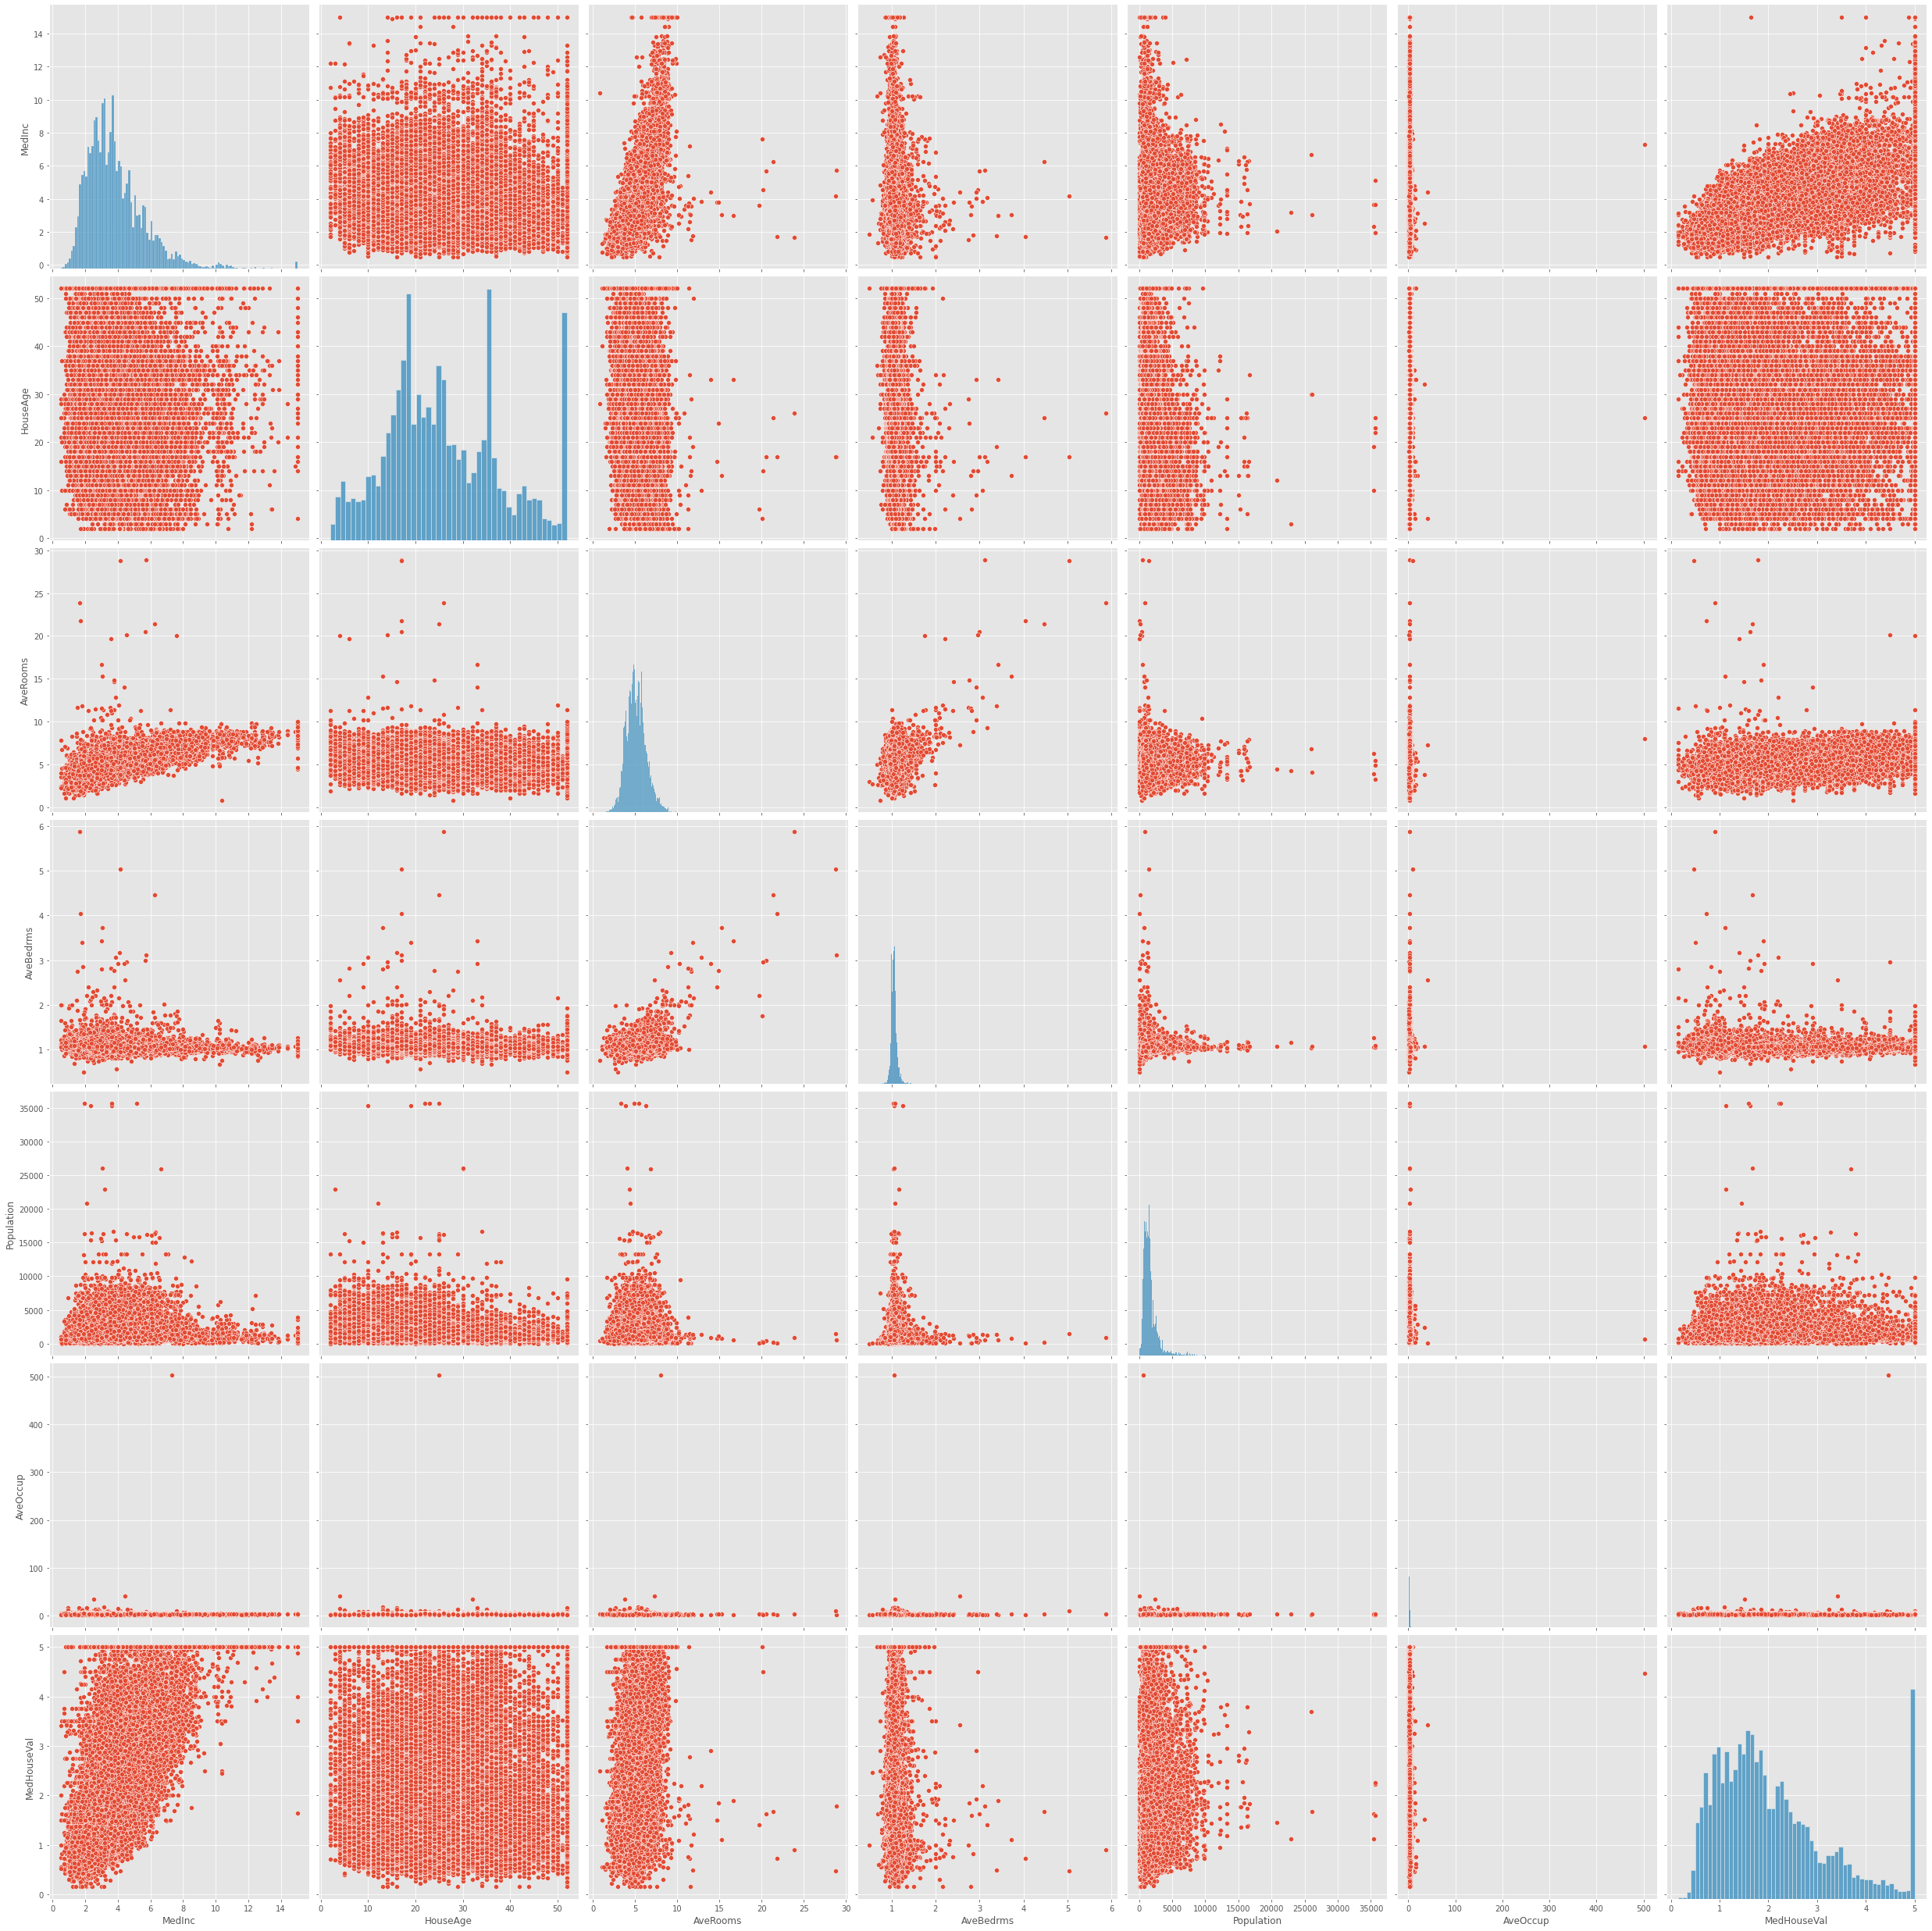

In [7]:
sns.pairplot(train.drop(columns = ['id', 'Latitude', 'Longitude'], axis = 1), height = 5);

> <div class="alert alert-block alert-info">
<b>Remarks:</b> From the above plots, most of the predictor variables and the target variable don't have a clear relationship. MedInc and MedHouseVal seem to have a postive (non-linear) relationship. Also note that the target variable (MedHouseVal) is right-censored at 5.

We next proceed to explore what features correlate the most with the MedHouseVal.

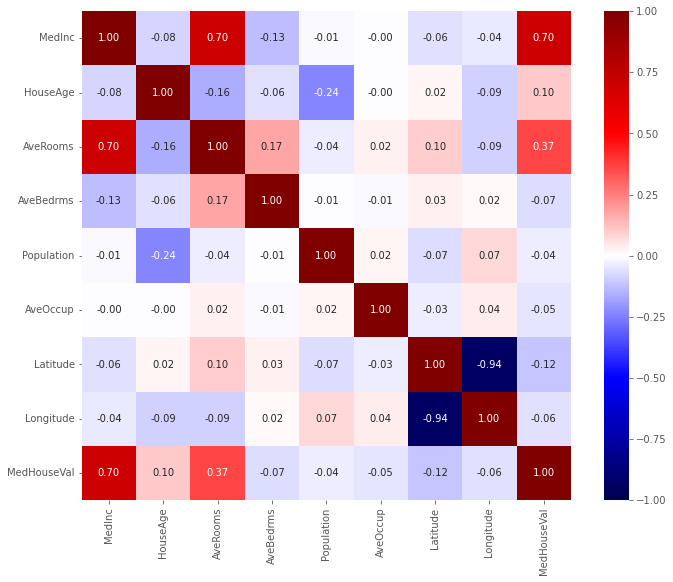

In [8]:
corr_mat = train.drop(columns = 'id', axis = 1).corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corr_mat, square = True, annot = True, fmt = '.2f', cmap = 'seismic', vmin = -1, vmax = 1);

> <div class="alert alert-block alert-info">
<b>Remarks:</b> From the above heatmap, we see that MedInc is the feauture that has the highest correlation with MedHouseVal. AveRooms is the second feature (in terms of correlation coefficient) that correlates with MedHouseVal. Also note that MedInc and AveRooms have a 0.7 correlation coeffiecient.

We next proceed to visualize the location of the houses from the train dataset in a map. The purpose is to see if we can find a spatial pattern.

In [9]:
fig = px.scatter_mapbox(train, 
                        lat = 'Latitude', 
                        lon = 'Longitude', 
                        color = 'MedHouseVal',
                        zoom = 5)

fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show();

> <div class="alert alert-block alert-info">
<b>Remarks:</b> From the above map, there are two take-aways: 
    1. location matters. Median house value is higher is locations such as San Francisco and Los Angeles.
    2. There are seven locations that fall outside of California. </div>

We next proceed to visualize the location of the houses from the test dataset in a map.

In [10]:
fig = px.scatter_mapbox(test, 
                        lat = 'Latitude', 
                        lon = 'Longitude', 
                        zoom = 5)

fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show();

> <div class="alert alert-block alert-info">
<b>Remarks:</b> From the above map, we see that there are about six locations that fall outside of California.
</div>

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Feature Engineering</h1>

In this section, we engineered a couple of tree-based features.

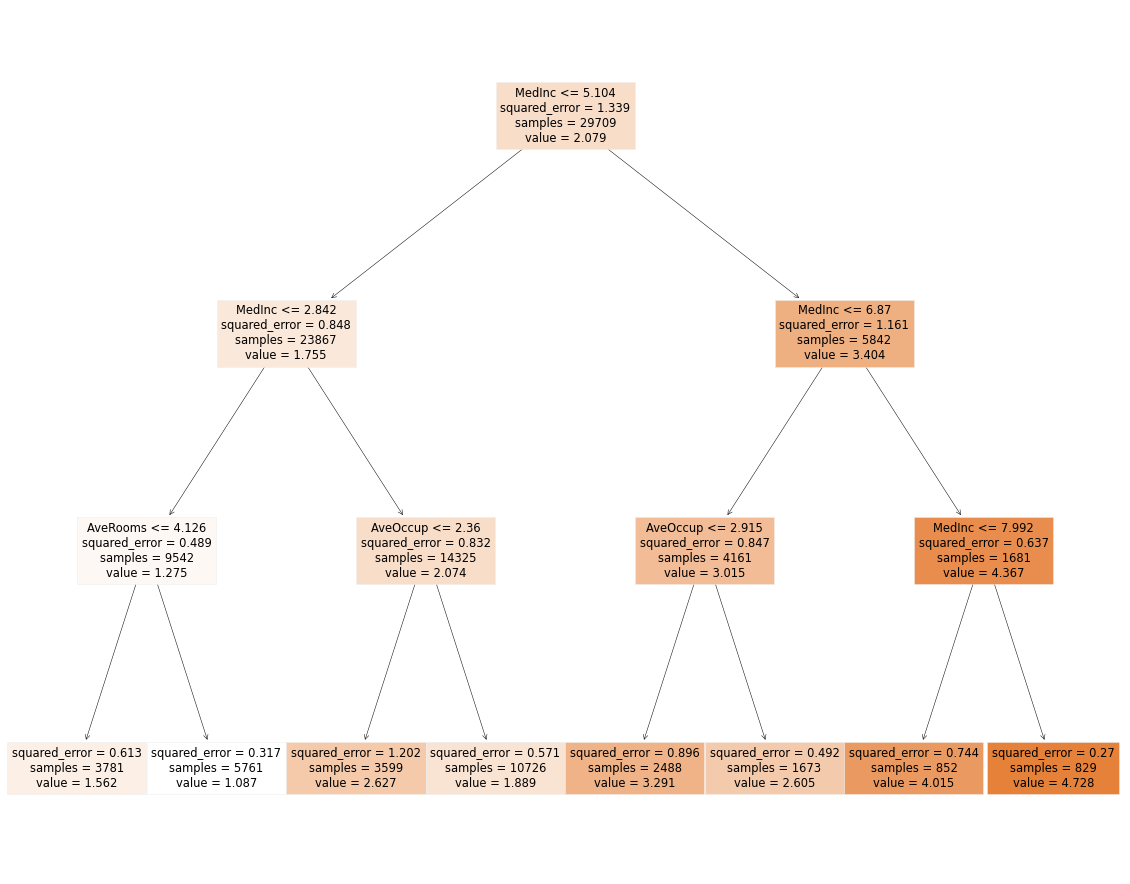

In [11]:
## Defining the input and target variables
X = train.drop(columns = ['id', 'MedHouseVal'], axis = 1)
Y = train['MedHouseVal']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True)

## Building a decision tree model with max depth = 3 on the train data-frame
tree_md = DecisionTreeRegressor(max_depth = 3).fit(X_train, Y_train)

## Visualizing the decision tree model and identify any interesting interactions/features
fig = plt.figure(figsize = (20, 16))
plot_tree(tree_md, feature_names = X.columns, filled = True);

Using the above decision-tree, we engineer the following features:

In [12]:
train['feature_1'] = np.where(train['MedInc'] >= 8, 1, 0)
train['feature_2'] = np.where(train['MedInc'] <= 5, 1, 0)
train['feature_3'] = np.where((train['MedInc'] <= 3) & (train['AveRooms'] >= 4), 1, 0)
# train['feature_4'] = np.where((train['MedInc'] > 5) & (train['MedInc'] <= 6.8) & (train['AveOccup'] >= 2.8), 1, 0)
# train['feature_5'] = train['AveBedrms'] + train['AveRooms']
# train['feature_6'] = train['AveBedrms'] / train['AveRooms']

test['feature_1'] = np.where(test['MedInc'] >= 8, 1, 0)
test['feature_2'] = np.where(test['MedInc'] <= 5, 1, 0)
test['feature_3'] = np.where((test['MedInc'] <= 3) & (test['AveRooms'] >= 4), 1, 0)
# test['feature_4'] = np.where((test['MedInc'] > 5) & (test['MedInc'] <= 6.8) & (test['AveOccup'] >= 2.8), 1, 0)
# test['feature_5'] = test['AveBedrms'] + test['AveRooms']
# test['feature_6'] = test['AveBedrms'] / test['AveRooms']

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Feature Selection</h1>

100%|██████████| 50/50 [01:46<00:00,  2.13s/it]


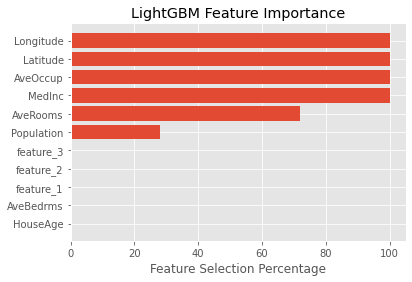

In [13]:
## Defining the input and target variables
X = train.drop(columns = ['id', 'MedHouseVal'], axis = 1)
Y = train['MedHouseVal']

## Defining empty list to store results
lightgbm_support= list()

## Repeating steps 50 times:
for i in tqdm(range(0, 50)):
    
    ## Splitting the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = i)
    
    ## Runing RFE (recursive feature elimination) with LightGBM as the base algorithm 
    ## (with n_features_to_select = 5)
    lightgbm_rfe = RFE(estimator = LGBMRegressor(), n_features_to_select = 5).fit(X_train, Y_train)
    
    ## Appending the features to be selected
    lightgbm_support.append(lightgbm_rfe.support_)
        
lightgbm_support = pd.DataFrame(lightgbm_support, columns = X.columns)
lightgbm_support = 100 * lightgbm_support.apply(np.sum, axis = 0) / lightgbm_support.shape[0]
lightgbm_support = lightgbm_support.sort_values(ascending = True)

# fig = plt.figure(figsize = (20, 16))
plt.barh(lightgbm_support.index, lightgbm_support.values)
plt.xlabel('Feature Selection Percentage')
plt.title('LightGBM Feature Importance');

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">k-NN Modeling</h1>

First we tune the number of neighbors as shown below.

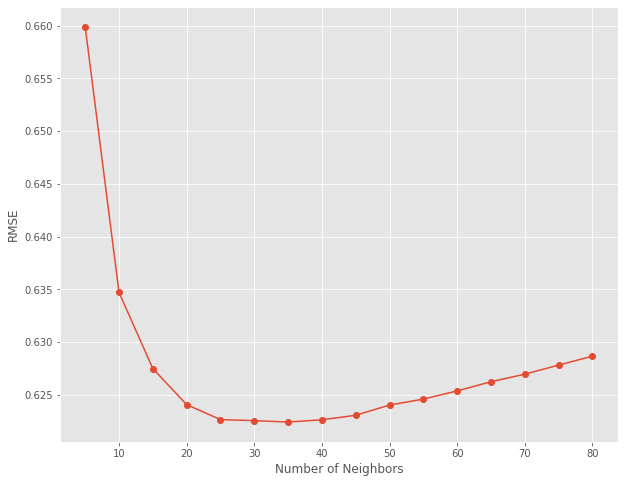

In [14]:
X = train[['Longitude', 'Latitude', 'MedInc']]
# X = train.drop(columns = ['id', 'MedHouseVal'], axis = 1)
Y = train['MedHouseVal']

scaler = MinMaxScaler()

## Neighbors to consider
k = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]

## Defining the split
kfold = KFold(n_splits = 5, shuffle = True, random_state = 94)

## Defining list to store results
knn_results = list()

for i in range(0, len(k)):

    for train_ix, test_ix in kfold.split(X, Y):
    
        ## Splitting the data 
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
        
        ## Scaling the data
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)
        
        ###################
        ## k-NN Modeling ##
        ###################
        
        knn_md = KNeighborsRegressor(n_neighbors = k[i], n_jobs = -1).fit(X_train, Y_train)

        ## Predicting on test
        knn_pred = knn_md.predict(X_test)
        
        ## Appending fold performance
        
        knn_results.append(mean_squared_error(Y_test, knn_pred, squared = False))

## Visualizing results 
fig = plt.figure(figsize = (10, 8))
rmse_results = [np.mean(knn_results[i:(i+5)]) for i in range(0, 80, 5)]
plt.plot(k, rmse_results, '-o')
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE');

> <div class="alert alert-block alert-info">
<b>Remarks:</b> Based on the results shown in the above plot, thirty neighbors seems to be the number of neighbors that minimize the rmse.
</div>

In [15]:
# X = train.drop(columns = ['id', 'MedHouseVal'], axis = 1)
X = train[['Longitude', 'Latitude', 'MedInc']]
Y = train['MedHouseVal']

scaler = MinMaxScaler()

## Defining list to store results
knn_results, lgb_results = list(), list()

for i in range(0, 5):
    
    kfold = KFold(n_splits = 5, shuffle = True, random_state = i)
    
    ## Defining list to store fold results
    knn_fold_result, lgb_fold_result = list(), list()
    
    for train_ix, test_ix in kfold.split(X, Y):
    
        ## Splitting the data 
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
        
        ## Scaling the data
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)
        
        ###################
        ## k-NN Modeling ##
        ###################
        
        knn_md = KNeighborsRegressor(n_neighbors = 30, n_jobs = -1, weights = 'distance').fit(X_train, Y_train)

        ## Predicting on test
        knn_pred = knn_md.predict(X_test)
        
        ## Appending fold performance
        knn_fold_result.append(mean_squared_error(Y_test, knn_pred, squared = False))
                                       
    ## Appending average mse k-fold run 
    knn_results.append(np.mean(knn_fold_result))

knn_performance = np.mean(knn_results)

print('The average RMSE of k-NN model over 5-fold CV (running 5 times) is', knn_performance)

The average RMSE of k-NN model over 5-fold CV (running 5 times) is 0.6238711754193773


<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">LightGBM Modeling</h1>

In [16]:
X = train.drop(columns = ['id', 'MedHouseVal'], axis = 1)
Y = train['MedHouseVal']

## Defining list to store results
knn_results, lgb_results = list(), list()

for i in range(0, 5):
    
    kfold = KFold(n_splits = 5, shuffle = True, random_state = i)
    
    ## Defining list to store fold results
    knn_fold_result, lgb_fold_result = list(), list()
    
    for train_ix, test_ix in kfold.split(X, Y):
    
        ## Splitting the data 
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
                
        #######################
        ## LightGBM Modeling ##
        #######################
        
        lgb_md = LGBMRegressor(n_estimators = 2000, 
                               learning_rate = 0.01,
                               num_leaves = 80,
                               max_depth = 15, 
                               lambda_l1 = 3, 
                               lambda_l2 = 1, 
                               bagging_fraction = 0.7, 
                               feature_fraction = 0.6).fit(X_train, Y_train)

        ## Predicting on test
        lgb_pred = lgb_md.predict(X_test)
        lgb_pred = np.where(lgb_pred > 5, 5, lgb_pred) # clipping prediction at 5 (based on https://www.kaggle.com/competitions/playground-series-s3e1/discussion/376396)
        
        ## Appending fold performance
        lgb_fold_result.append(mean_squared_error(Y_test, lgb_pred, squared = False))
                               
    ## Appending average mse k-fold run 
    lgb_results.append(np.mean(lgb_fold_result))
    
lgb_performance = np.mean(lgb_results)

print('The average RMSE of LightGBM over 5-fold CV (running 5 times) is', lgb_performance)

[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] 

In [17]:
X = train.drop(columns = ['id', 'MedHouseVal'], axis = 1)
Y = train['MedHouseVal']

X_test = test.drop(columns = 'id', axis = 1) 

## Building the LightGBM model
lgb_md = LGBMRegressor(n_estimators = 2000, 
                       learning_rate = 0.01,
                       num_leaves = 80,
                       max_depth = 15, 
                       lambda_l1 = 3, 
                       lambda_l2 = 1, 
                       bagging_fraction = 0.7, 
                       feature_fraction = 0.6).fit(X, Y)

lgb_pred = lgb_md.predict(X_test)
lgb_pred = np.where(lgb_pred > 5, 5, lgb_pred)

# ## Scaling the input variables
# X = scaler.fit_transform(X)
# X_test = scaler.fit_transform(X_test)

# ## Building the k-NN model
# knn_md = KNeighborsRegressor(n_neighbors = 45, n_jobs = -1).fit(X, Y)
# knn_pred = knn_md.predict(X_test)

# ## Ensemble 
# w1 = 1 / knn_performance
# w2 = 1/ lgb_performance
# wtot = w1 + w2

# w1 = w1 / wtot
# w2 = w2 / wtot

# submission['MedHouseVal'] = w1*knn_pred + w2*lgb_pred
submission['MedHouseVal'] = lgb_pred
submission.head()

[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


,id,MedHouseVal
0,37137,0.645410
1,37138,0.989447
2,37139,4.102230
3,37140,3.156480
4,37141,2.405801


In [18]:
submission.to_csv('lgb_submission_nb_01_07_2023.csv', index = False)